In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [17]:
if os.path.exists('./forest_fire.txt'):
    with open('forest_fire.txt', 'r') as f:
        data = f.readlines()
    y=[int(d) for d in data]
else:
    y = []
    x = np.arange(100000)

    for n in x:
        i, j, b = 1, 1, set()

        while n-2*i >= 0:
            b.add(2*y[n-i]-y[n-2*i])
            i += 1

            while j in b:
                b.remove(j)
                j += 1

        y.append(j)
    
    y = np.array(y)
    nx = np.random.choice(x, int(len(x)*.95), replace=False)
    ny = y[nx]
    
    with open('forest_fire.txt', 'w') as file:
        file.write('\n'.join(str(v) for v in y))



In [27]:
y = np.array(y)
x = np.arange(100000)
nx = np.random.choice(x, int(len(x)*1), replace=False)
ny = y[nx]

In [28]:
len(nx)

100000

In [45]:
# size = (20,20)
size = (60,60)
background = 'black'
# cmap_name = 'hot_r'
cmap_name = 'cool'
# cmap_name = 'twilight'

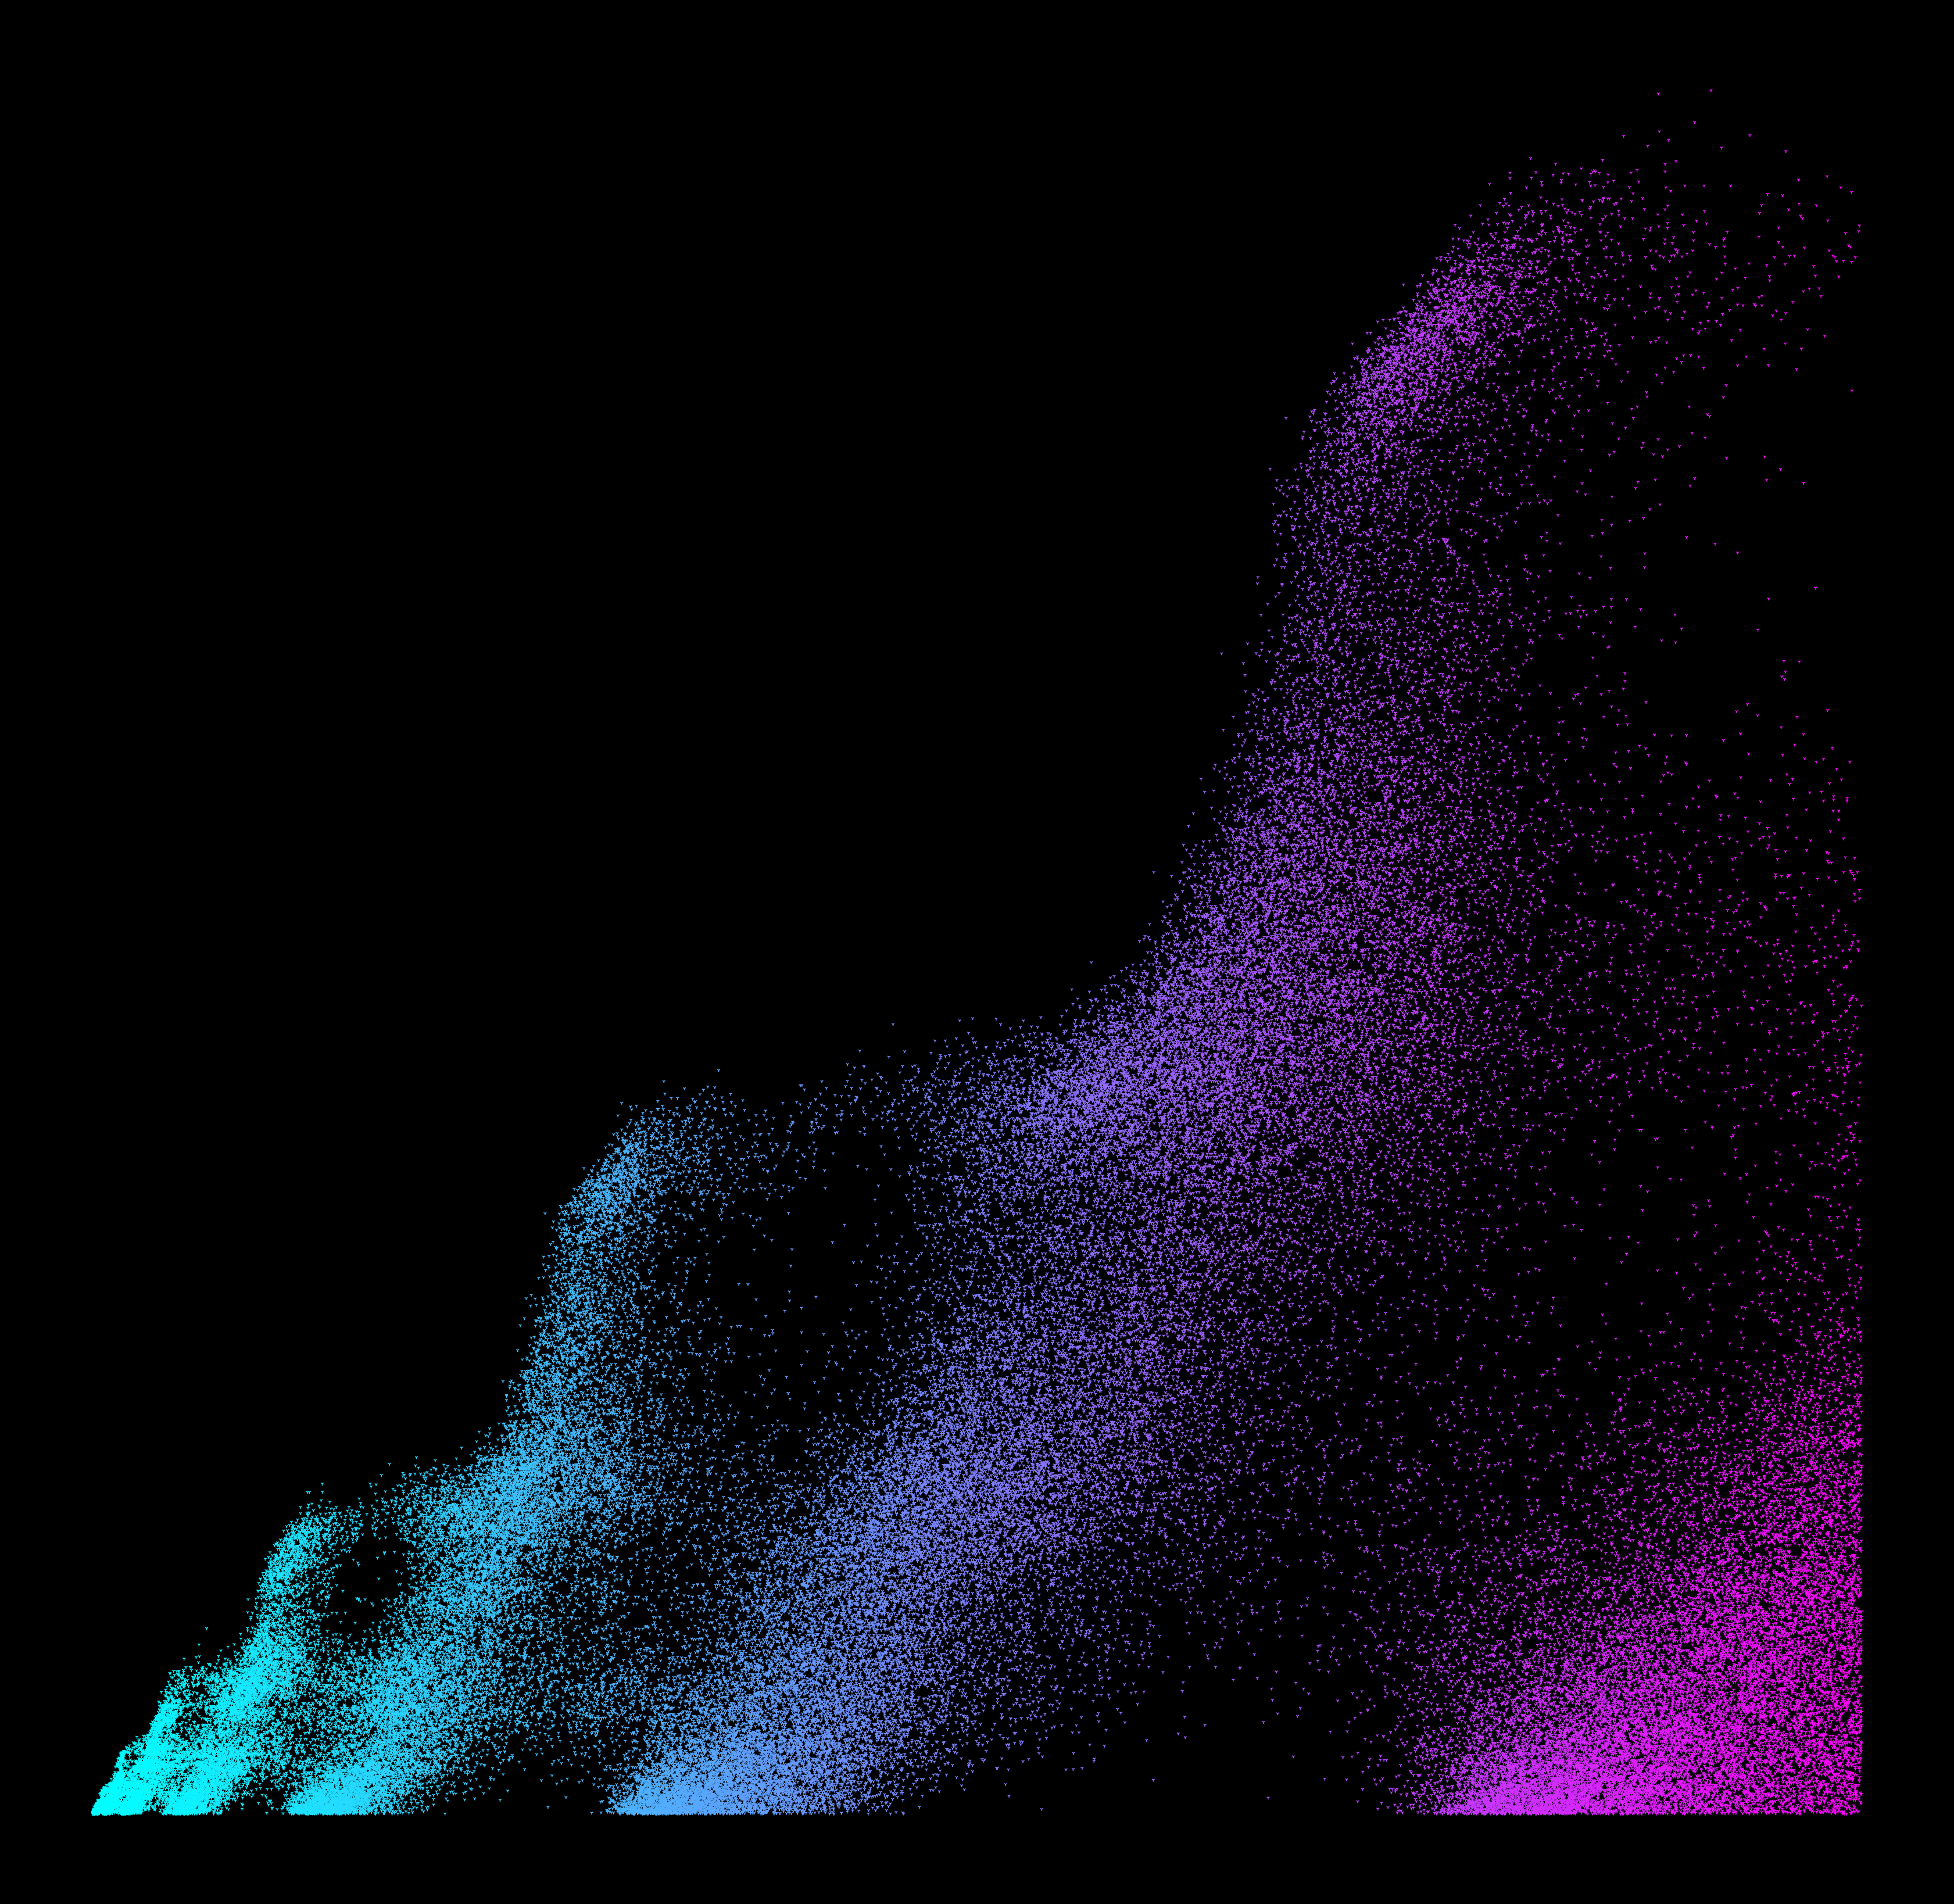

In [46]:
fig, ax = plt.subplots()
fig.set_size_inches(size)
fig.patch.set_visible(True)
fig.patch.set_facecolor(background)
ax.axis('off')

plt.scatter(nx, ny, c=nx, cmap=cmap_name, marker='1')
plt.show()

In [14]:
def a(n, d):
    if n == 1 or n == 2:
        if n in d:
            d[n] = 1
        return 1
    else:
        if n in d:
            v = d[n]
        else:
            v = a(a(n-1, d), d) + a(n - a(n-2, d) - 1, d)
            d[n] = v
        return v

In [24]:
l = []
for i in range(1,1000):
    l.append(a(i, {}))

In [2]:
l = []
x = range(1,10000001)

for i, n in enumerate(x):
    if n == 1 or n == 2:
        l.append(1)
    else:
        fIdx = n-1
        fInner = l[fIdx-1]
        first = l[fInner-1]
        
        sIdx = n-2
        sInner = l[sIdx-1]
        tInner = n-sInner-1
        second = l[tInner-1]
        val = first+second
        l.append(val)


In [4]:
size = (20,10) 
background = 'black'
# cmap_name = 'Purples'
# cmap_name = 'cool'
cmap_name = 'twilight'

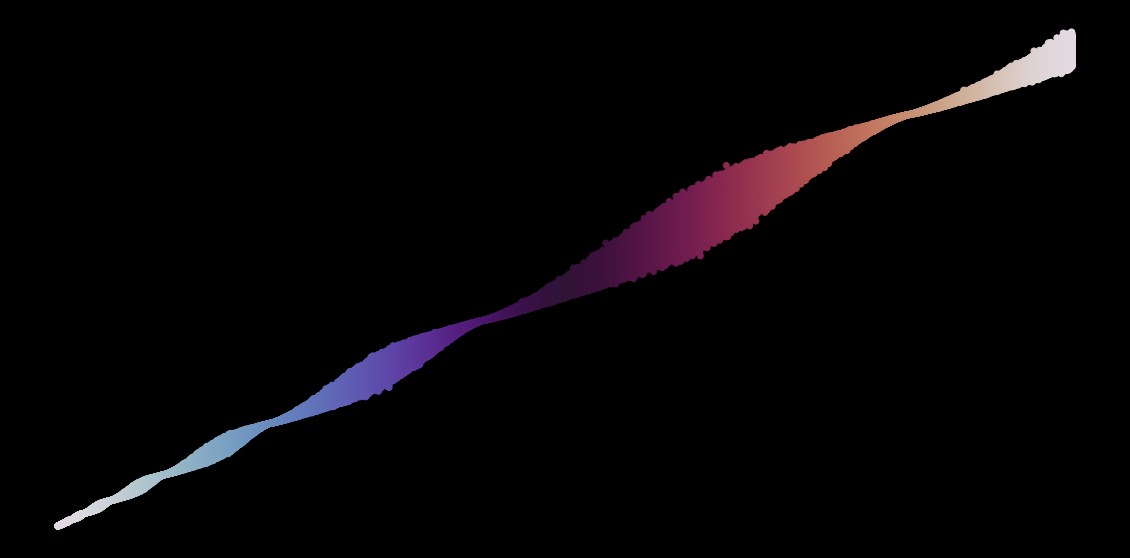

In [5]:
fig, ax = plt.subplots()
fig.set_size_inches(size)
fig.patch.set_visible(True)
fig.patch.set_facecolor(background)
ax.axis('off')

plt.scatter(x, l, c=x, cmap=cmap_name)
plt.show()